In [36]:
###ESSENTIAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
!pip install backtrader
import backtrader as bt
import pytz
import time
from datetime import datetime, time as dtime
from datetime import time
import time as time_module
from datetime import time


#Strategy: Shorting a stock whenever it starts off with a 80-100% jump at opening.
##Rationale: Stock price revert back to mean at closing.
###1. Money Weighted average price -> each time the stock price rises increase the short to average out the selling price to 10% less than the latest price.
###2. if initial short bought at $$1 and share price goes up to $2 the total value of the short must be $1.8, average out the position accordingly and tilt towards the max  

/tmp/ipython-input-2219166682.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download(stock, interval=interval, period=period)
[*********************100%***********************]  1 of 1 completed

Previous day: 2025-08-04
Max datetime: 2025-08-04 15:55:00-04:00
Closing price: 203.33999633789062


Price,Open,Close
Ticker,AAPL,AAPL
Datetime,,
2025-08-04 09:30:00-04:00,204.505005,205.479202
2025-08-04 09:35:00-04:00,205.479996,205.199997
2025-08-04 09:40:00-04:00,205.210007,205.419998
2025-08-04 09:45:00-04:00,205.380005,205.865005
2025-08-04 09:50:00-04:00,205.865005,205.979401


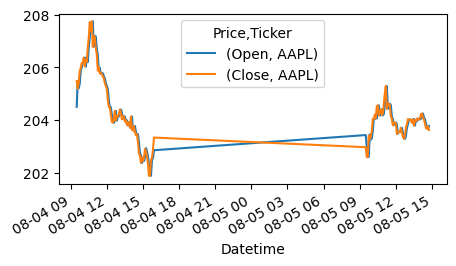

KeyError: Timestamp('2025-08-01 09:30:00-0400', tz='US/Eastern')

In [ ]:
###ESSENTIAL - Not Main Code
def download_data(stock, interval, period):
    data = pd.DataFrame()
    ticker = stock
    #ticker = yf.download(stock, start=start_date, end=end_date)
    ticker = yf.download(stock, interval=interval, period=period)
    ticker.index = ticker.index.tz_convert('US/Eastern')
    data = ticker[['Open','Close']]# the OG statement
    #data = ticker # comment out later

    data.index = data.index.tz_convert('US/Eastern')

    # Step 2: Get the latest datetime in the dataset
    latest_date = data.index[-1].date()

    # Step 3: Get the previous date in the dataset before the latest one
    available_dates = sorted(set(data.index.date))
    prev_date = [d for d in available_dates if d < latest_date][-1]

    # Step 4: Get the max datetime for that previous day
    prev_day_max_dt = data[data.index.date == prev_date].index.max()

    # Step 5: Get the close price at that timestamp
    close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

    print("Previous day:", prev_date)
    print("Max datetime:", prev_day_max_dt)
    print("Closing price:", close_price)

    data.plot(figsize=(5, 2.5))
    display(data.head())
    plt.show()

    target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern')

    latest_open_price = data.loc[target_time,'Open'].values[0]

    if latest_open_price/close_price > 1.8:
        print('Buy')
    else:
        print('Sell')
    #return data.index.tz



#def strategy(data):

if __name__ == '__main__':
  download_data('AAPL', '5m', '2d')

In [ ]:
# Summary of today (8/3/25): trying to extract data -> using IBKR -> converting lite account to pro account because pro gives access to API
# Yfinance also gives 5m trading data for 30 days but i'd like to connect a live trading account to get live prices
# I cant use IBKR because my networth is less than $20K
# Lets stat with yFinance - G
# If statement to check yesterdays closing price and see if the stock at opens at a higher than previous days close - ready
# WE ARE READY TO START TESTING THE STRATEGY

In [ ]:
###NOT ESSENTIAL

import yfinance as yf
import pandas as pd

# Step 1: Download recent 5-minute data
data = yf.download('AAPL', interval='5m', period='2d')
data.index = data.index.tz_convert('US/Eastern')

# Step 2: Get the latest datetime in the dataset
latest_date = data.index[-1].date()

# Step 3: Get the previous date in the dataset before the latest one
available_dates = sorted(set(data.index.date))
prev_date = [d for d in available_dates if d < latest_date][-1]

# Step 4: Get the max datetime for that previous day
prev_day_max_dt = data[data.index.date == prev_date].index.max()

# Step 5: Get the close price at that timestamp
close_price = data.loc[prev_day_max_dt, 'Close']

print("Previous day:", prev_date)
print("Max datetime:", prev_day_max_dt)
print("Closing price:", close_price)
data.head()

###NOT ESSENTIAL

In [ ]:
###ESSENTIAL -- Main Code
def download_data(stock, interval, period): #- UNCOMMENT IRL testing
#def download_data(stock, interval, period=None, start_date=None, end_date=None): # COMMENT during IRL testing
  data = pd.DataFrame()
  ticker = stock
  #ticker = yf.download(stock, start=start_date, end=end_date) - old version irrelavant
  ticker = yf.download(stock, interval=interval, period=period) # - UNCOMMENT during IRL testing
  #ticker = yf.download(stock, start=start_date, end=end_date, interval=interval) # COMMENT during IRL testing
  data = ticker[['Open','Close']]# the OG statement
  #data = ticker # comment out later
  #display(data.tail(5))
  return data

def convert_data(data):

  # Step 1: Convert the latest datetime to ET
  data.index = data.index.tz_convert('US/Eastern')

  # Step 2: Get the latest datetime in the dataset
  latest_date = data.index[-1].date()

  # Step 3: Get the previous date in the dataset before the latest one
  available_dates = sorted(set(data.index.date))
  prev_date = [d for d in available_dates if d < latest_date][-1]

  # Step 4: Get the max datetime for that previous day
  prev_day_max_dt = data[data.index.date == prev_date].index.max()

  # Step 5: Get the close price at that timestamp
  close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

  #print("Previous day:", prev_date)
  #print("Max datetime:", prev_day_max_dt)
  print("Closing price:", close_price)

  # Step 6: Plot the latest stock movement graph
  prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
  #display(prev_data.iloc[-1])
  plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
  #display(plot_data)
  plot_data = plot_data.between_time('09:29', '15:59')
  plot_data['Close'].plot(figsize=(6, 2.5))
  #display(plot_data.head(10))
  last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  #display(last_day_data)
  latest_data = pd.DataFrame()
  latest_data['Close'] =  last_day_data['Close']
  latest_data.plot(figsize=(24, 2.5))
  #display(latest_data.head(10))
  plt.show()

  #target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern') - previous version
  target_time = data[data.index.date == latest_date].index.min() # correct and the best version
  #target_time = pd.Timestamp(data.index[0]) # new version - wrong version

  latest_open_price = data.loc[target_time,'Open'].values[0]
  print('Latest Open Price:', latest_open_price)
  display(latest_data.head(5))
  return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data):

  if latest_open_price/close_price > 1.5:
    signal = -1
    shares = -100
    cost  = shares * latest_open_price
    mwap = abs(cost/shares)

    count = 0
    for ts, row in latest_data.iterrows():
      latest_price = row['Close']
      target_price = latest_price * 0.9

      count += 1

      if mwap < target_price:
        add_shares = (0.9*latest_price*shares - mwap*shares)/(0.1*latest_price)
        shares += add_shares
        new_cost = add_shares*latest_price
        cost += new_cost
        mwap = abs(cost/shares)

        print(f"Time: {ts}")
        print(f"New shares purchased: {add_shares}")
        print(f"Latest MWAP: {mwap}")
        print(f"Updated total cost: {cost}")
        print("-" * 40)

        #print(f'New Short Placed at', latest_price)
        #print(f'New Shares', shares)
        #print(f'New MWAP', mwap)

    count -= 1

    print(count)
    close_price = latest_data['Close'].iloc[count]
    pnl = (mwap - close_price) * abs(shares)
    print(f'PnL is', pnl)


def market_hours_loop():
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)  # 9:29 AM Eastern
    end_time = dtime(16, 1)   # 4:01 PM Eastern

    while True:
        now_eastern = datetime.now(eastern).time()

        if start_time <= now_eastern <= end_time:
            data = download_data('ATNF', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
            #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data)

        # Sleep 30 seconds
        time_module.sleep(30)

if __name__ == '__main__':
  #data = download_data('PHLT', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
  #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
  #latest_open_price, close_price, last_day_data = convert_data(data)
  #strategy(latest_open_price, close_price, last_day_data) # UNCOMMENT this when not using market_hours_loop
  market_hours_loop()

In [44]:
###ESSENTIAL -- DEBUG Code
def download_data(stock, interval, period): #- UNCOMMENT IRL testing
#def download_data(stock, interval, period=None, start_date=None, end_date=None): # COMMENT during IRL testing
  data = pd.DataFrame()
  ticker = stock
  #ticker = yf.download(stock, start=start_date, end=end_date) - old version irrelavant
  ticker = yf.download(stock, interval=interval, period=period) # - UNCOMMENT during IRL testing
  #ticker = yf.download(stock, start=start_date, end=end_date, interval=interval) # COMMENT during IRL testing
  data = ticker[['Open','Close']]# the OG statement
  #data = ticker # comment out later
  #display(data.tail(5))
  print(data.head(5))
  return data

def convert_data(data):

  # Step 1: Convert the latest datetime to ET
  data.index = data.index.tz_convert('US/Eastern')

  # Step 2: Get the latest datetime in the dataset
  latest_date = data.index[-1].date()

  # Step 3: Get the previous date in the dataset before the latest one
  available_dates = sorted(set(data.index.date))
  prev_date = [d for d in available_dates if d < latest_date][-1]

  # Step 4: Get the max datetime for that previous day
  prev_day_max_dt = data[data.index.date == prev_date].index.max()

  # Step 5: Get the close price at that timestamp
  close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

  #print("Previous day:", prev_date)
  #print("Max datetime:", prev_day_max_dt)
  print("Closing price:", close_price)

  # Step 6: Plot the latest stock movement graph
  prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
  #display(prev_data.iloc[-1])
  plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
  #display(plot_data)
  plot_data = plot_data.between_time('09:29', '15:59')
  plot_data['Close'].plot(figsize=(6, 2.5))
  #display(plot_data.head(10))
  last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  #display(last_day_data)
  latest_data = pd.DataFrame()
  latest_data['Close'] =  last_day_data['Close']
  latest_data.plot(figsize=(24, 2.5))
  #display(latest_data.head(10))
  plt.show()

  #target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern') - previous version
  target_time = data[data.index.date == latest_date].index.min() # correct and the best version
  #target_time = pd.Timestamp(data.index[0]) # new version - wrong version

  latest_open_price = data.loc[target_time,'Open'].values[0]
  print('Latest Open Price:', latest_open_price)
  display(latest_data.head(5))
  return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data):

  print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
  print(f"DEBUG: ratio={latest_open_price / close_price}")

  if latest_open_price / close_price > 1.7: # updated from real terms of 1.8
      signal = -1
      shares = -100
      cost = shares * latest_open_price
      mwap = abs(cost / shares)

      print(f"Initial MWAP: {mwap}, Shares: {shares}, Cost: {cost}")
      count = 0
      for ts, row in latest_data.iterrows():
          latest_price = row['Close']
          target_price = latest_price * 0.90 # modified to within 95% of the max

          print(f"DEBUG Loop: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost = {cost}, shares = {shares}")
          count += 1
          if mwap < target_price:
              add_shares = (0.90 * latest_price * shares - mwap * shares) / (0.1* latest_price)
              shares += add_shares
              new_cost = add_shares * latest_price
              cost += new_cost
              mwap = abs(cost / shares)

              print(f"Time: {ts}")
              print(f"New shares purchased: {add_shares}")
              print(f"Latest MWAP: {mwap}")
              print(f"Updated total cost: {cost}")
              print("-" * 40)
      count -= 1
      print(count)
      close_price = latest_data['Close'].iloc[count]
      pnl = (mwap - close_price) * abs(shares)
      print(f'PnL is', pnl)

def market_hours_loop():
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)  # 9:29 AM Eastern
    end_time = dtime(16, 1)   # 4:01 PM Eastern

    while True:
        now_eastern = datetime.now(eastern).time()

        if start_time <= now_eastern <= end_time:
            #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing
            data = download_data('ATNF', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data)

        # Sleep 30 seconds
        time_module.sleep(30)

if __name__ == '__main__':
  #data = download_data('PHLT', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
  #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
  #latest_open_price, close_price, last_day_data = convert_data(data)
  #strategy(latest_open_price, close_price, last_day_data) # UNCOMMENT this when not using market_hours_loop
  market_hours_loop()

KeyboardInterrupt: 

In [ ]:
# BTAI - op/cp > 1.25
# 95% range of the highest
# update for today - everything is working fine, verify mwap and, with the formula

In [43]:
# === ESSENTIAL -- Main Code === idk

def download_data(stock, interval, period):  # - UNCOMMENT IRL testing
    # def download_data(stock, interval, period=None, start_date=None, end_date=None):  # COMMENT during IRL testing
    data = pd.DataFrame()
    ticker = stock
    # ticker = yf.download(stock, start=start_date, end=end_date)  # old version irrelevant
    ticker = yf.download(stock, interval=interval, period=period)  # - UNCOMMENT during IRL testing
    # ticker = yf.download(stock, start=start_date, end=end_date, interval=interval)  # COMMENT during IRL testing
    data = ticker[['Open', 'Close']]  # the OG statement
    # data = ticker  # comment out later
    # display(data.tail(5))
    return data

def convert_data(data):
    data.index = data.index.tz_convert('US/Eastern')
    latest_date = data.index[-1].date()
    available_dates = sorted(set(data.index.date))
    prev_date = [d for d in available_dates if d < latest_date][-1]
    prev_day_max_dt = data[data.index.date == prev_date].index.max()
    close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

    print("Closing price:", close_price)

    prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
    plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
    plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
    plot_data = plot_data.between_time('09:29', '15:59')
    plot_data['Close'].plot(figsize=(6, 2.5))

    last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
    latest_data = pd.DataFrame()
    latest_data['Close'] = last_day_data['Close']
    latest_data.plot(figsize=(24, 2.5))
    plt.show()

    target_time = data[data.index.date == latest_date].index.min()
    latest_open_price = data.loc[target_time, 'Open'].values[0]

    print('Latest Open Price:', latest_open_price)
    display(latest_data.head(5))

    return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data):
    if latest_open_price / close_price > 1.35:
        signal = -1
        shares = -100
        cost = shares * latest_open_price
        mwap = abs(cost / shares)

        count = 0
        for ts, row in latest_data.iterrows():
            latest_price = row['Close']
            target_price = latest_price * 0.9
            count += 1

            if mwap < target_price:
                add_shares = (0.9 * latest_price * shares - mwap * shares) / (0.1 * latest_price)
                shares += add_shares
                new_cost = add_shares * latest_price
                cost += new_cost
                mwap = abs(cost / shares)

                print(f"Time: {ts}")
                print(f"New shares purchased: {add_shares}")
                print(f"Latest MWAP: {mwap}")
                print(f"Updated total cost: {cost}")
                print("-" * 40)

        count -= 1
        close_price = latest_data['Close'].iloc[count]
        pnl = (mwap - close_price) * abs(shares)
        print(f'PnL is', pnl)

def market_hours_loop():
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)  # 9:29 AM Eastern
    end_time = dtime(16, 1)    # 4:01 PM Eastern

    while True:
        now_eastern = datetime.now(eastern).time()

        if start_time <= now_eastern <= end_time:
            data = download_data('CCCC', '1m', '2d')
          # data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') #COMMENT DURING IRL TESTING
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data)

        time.sleep(30)

if __name__ == '__main__':
    # data = download_data('PHLT', '1m', '2d')
    # data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06')
    # latest_open_price, close_price, last_day_data = convert_data(data)
    # strategy(latest_open_price, close_price, last_day_data)
    market_hours_loop()


AttributeError: type object 'datetime.time' has no attribute 'sleep'

In [ ]:
# changes
# Check first few market open price for the first 10 minutes,
# if at any point the price is above 80% then start shorting the stock. first do this then work on API integration
# Try to incorporate Pre market
# locate should be available
# whenever during the start of the trading the stock is 80% above the previous day.


In [42]:
###ESSENTIAL -- DEBUG Code -- latest updated with 10 min condition
def download_data(stock, interval, period): #- UNCOMMENT IRL testing
#def download_data(stock, interval, period=None, start_date=None, end_date=None): # COMMENT during IRL testing
  data = pd.DataFrame()
  ticker = stock
  #ticker = yf.download(stock, start=start_date, end=end_date) - old version irrelavant
  ticker = yf.download(stock, interval=interval, period=period) # - UNCOMMENT during IRL testing
  #ticker = yf.download(stock, start=start_date, end=end_date, interval=interval) # COMMENT during IRL testing
  data = ticker[['Open','Close']]# the OG statement
  #data = ticker # comment out later
  #display(data.tail(5))
  print(data.head(5))
  return data

def convert_data(data):

  # Step 1: Convert the latest datetime to ET
  data.index = data.index.tz_convert('US/Eastern')

  # Step 2: Get the latest datetime in the dataset
  latest_date = data.index[-1].date()

  # Step 3: Get the previous date in the dataset before the latest one
  available_dates = sorted(set(data.index.date))
  prev_date = [d for d in available_dates if d < latest_date][-1]

  # Step 4: Get the max datetime for that previous day
  prev_day_max_dt = data[data.index.date == prev_date].index.max()

  # Step 5: Get the close price at that timestamp
  close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

  #print("Previous day:", prev_date)
  #print("Max datetime:", prev_day_max_dt)
  print("Closing price:", close_price)

  # Step 6: Plot the latest stock movement graph
  prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
  #display(prev_data.iloc[-1])
  plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
  #display(plot_data)
  plot_data = plot_data.between_time('09:29', '15:59')
  plot_data['Close'].plot(figsize=(6, 2.5))
  #display(plot_data.head(10))
  last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  #display(last_day_data)
  latest_data = pd.DataFrame()
  latest_data['Close'] =  last_day_data['Close']
  latest_data.plot(figsize=(24, 2.5))
  #display(latest_data.head(10))
  plt.show()

  #target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern') - previous version
  target_time = data[data.index.date == latest_date].index.min() # correct and the best version
  #target_time = pd.Timestamp(data.index[0]) # new version - wrong version

  latest_open_price = data.loc[target_time,'Open'].values[0]
  print('Latest Open Price:', latest_open_price)
  display(latest_data.head(5))
  return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data):

  if latest_data.index[-1].time() < time(9, 40, 0) and latest_open_price/close_price >= 1.3:

    print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
    print(f"DEBUG: ratio={latest_open_price / close_price}")

    if latest_open_price / close_price > 1.3: # updated from real terms of 1.8
        signal = -1
        shares = -100
        cost = shares * latest_open_price
        mwap = abs(cost / shares)

        print(f"Initial MWAP: {mwap}, Shares: {shares}, Cost: {cost}")
        count = 0
        for ts, row in latest_data.iterrows():
            latest_price = row['Close']
            target_price = latest_price * 0.90 # modified to within 95% of the max

            print(f"DEBUG Loop: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost = {cost}, shares = {shares}")
            count += 1

            if mwap < target_price:
                add_shares = (0.90 * latest_price * shares - mwap * shares) / (0.1* latest_price)
                shares += add_shares
                new_cost = add_shares * latest_price
                cost += new_cost
                mwap = abs(cost / shares)

                print(f"Time: {ts}")
                print(f"New shares purchased: {add_shares}")
                print(f"Latest MWAP: {mwap}")
                print(f"Updated total cost: {cost}")
                print("-" * 40)

  elif latest_open_price/close_price >= 1.3:

    print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
    print(f"DEBUG: ratio={latest_open_price / close_price}")

    for ts, row in latest_data.iterrows():
      latest_price = row['Close']
      target_price = latest_price * 0.90 # modified to within 95% of the max

      print(f"DEBUG Loop: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost = {cost}, shares = {shares}")

      count += 1

      if mwap < target_price:
        add_shares = (0.90 * latest_price * shares - mwap * shares) / (0.1* latest_price)
        shares += add_shares
        new_cost = add_shares * latest_price
        cost += new_cost
        mwap = abs(cost / shares)

        print(f"Time: {ts}")
        print(f"New shares purchased: {add_shares}")
        print(f"Latest MWAP: {mwap}")
        print(f"Updated total cost: {cost}")
        print("-" * 40)
    count -= 1
    print(count)
    close_price = latest_data['Close'].iloc[count]
    pnl = (mwap - close_price) * abs(shares)
    print(f'PnL is', pnl)

  else:
    print("Condition not met.")

def market_hours_loop():
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)  # 9:29 AM Eastern
    end_time = dtime(16, 1)   # 4:01 PM Eastern

    while True:
        now_eastern = datetime.now(eastern).time()

        if start_time <= now_eastern <= end_time:
            #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing
            data = download_data('ATNF', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data)

        # Sleep 30 seconds
        time.sleep(30)

if __name__ == '__main__':
  #data = download_data('PHLT', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
  #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
  #latest_open_price, close_price, last_day_data = convert_data(data)
  #strategy(latest_open_price, close_price, last_day_data) # UNCOMMENT this when not using market_hours_loop
  market_hours_loop()

AttributeError: type object 'datetime.time' has no attribute 'sleep'

In [6]:
# --- imports to avoid name collisions ---
from datetime import datetime, time as dtime
import time as time_mod  # for sleep()
# (keep your other imports: pandas as pd, matplotlib.pyplot as plt, pytz, yfinance as yf, etc.)



In [41]:
###ESSENTIAL -- DEBUG Code -- latest updated with 10 min condition -- dont change this code
def download_data(stock, interval, period): #- UNCOMMENT IRL testing
#def download_data(stock, interval, period=None, start_date=None, end_date=None): # COMMENT during IRL testing
  data = pd.DataFrame()
  ticker = stock
  #ticker = yf.download(stock, start=start_date, end=end_date) - old version irrelavant
  ticker = yf.download(stock, interval=interval, period=period) # - UNCOMMENT during IRL testing
  #ticker = yf.download(stock, start=start_date, end=end_date, interval=interval) # COMMENT during IRL testing
  data = ticker[['Open','Close']]# the OG statement
  #data = ticker # comment out later
  #display(data.tail(5))
  print(data.head(5))
  return data

def convert_data(data):

  # Step 1: Convert the latest datetime to ET
  data.index = data.index.tz_convert('US/Eastern')

  # Step 2: Get the latest datetime in the dataset
  latest_date = data.index[-1].date()

  # Step 3: Get the previous date in the dataset before the latest one
  available_dates = sorted(set(data.index.date))
  prev_date = [d for d in available_dates if d < latest_date][-1]

  # Step 4: Get the max datetime for that previous day
  prev_day_max_dt = data[data.index.date == prev_date].index.max()

  # Step 5: Get the close price at that timestamp
  close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

  #print("Previous day:", prev_date)
  #print("Max datetime:", prev_day_max_dt)
  print("Closing price:", close_price)

  # Step 6: Plot the latest stock movement graph
  prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
  #display(prev_data.iloc[-1])
  plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
  #display(plot_data)
  plot_data = plot_data.between_time('09:29', '15:59')
  plot_data['Close'].plot(figsize=(6, 2.5))
  #display(plot_data.head(10))
  last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  #display(last_day_data)
  latest_data = pd.DataFrame()
  latest_data['Close'] =  last_day_data['Close']
  latest_data.plot(figsize=(24, 2.5))
  #display(latest_data.head(10))
  plt.show()

  #target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern') - previous version
  target_time = data[data.index.date == latest_date].index.min() # correct and the best version
  #target_time = pd.Timestamp(data.index[0]) # new version - wrong version

  latest_open_price = data.loc[target_time,'Open'].values[0]
  print('Latest Open Price:', latest_open_price)
  display(latest_data.head(5))
  return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data, threshold = 1.3):
    # Quick gate: only act if open jump >= 30%
    ratio = latest_open_price / close_price
    if ratio < threshold:
        print("Condition not met.")
        return

    # Use datetime.time aliased as dtime; latest_data index should be tz-aware ET already
    before_940 = latest_data.index[-1].time() < dtime(9, 40, 0)

    print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
    print(f"DEBUG: ratio={ratio}")

    # Initialize trading state once (works for both branches)
    signal = -1
    shares = -100
    cost = shares * latest_open_price
    mwap = abs(cost / shares)
    print(f"Initial MWAP: {mwap}, Shares: {shares}, Cost: {cost}")

    count = 0
    for ts, row in latest_data.iterrows():
        latest_price = row['Close']
        target_price = latest_price * 0.90  # 10% below latest
        print(f"DEBUG Loop: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost={cost}, shares={shares}")

        count += 1

        if mwap < target_price:
            add_shares = (0.90 * latest_price * shares - mwap * shares) / (0.10 * latest_price)
            shares += add_shares
            new_cost = add_shares * latest_price
            cost += new_cost
            mwap = abs(cost / shares)

            print(f"Time: {ts}")
            print(f"New shares purchased: {add_shares}")
            print(f"Latest MWAP: {mwap}")
            print(f"Updated total cost: {cost}")
            print("-" * 40)

    # Close/PnL calc using the last observed close in latest_data
    if count > 0:
        close_at_end = latest_data['Close'].iloc[count - 1]
        pnl = (mwap - close_at_end) * abs(shares)
        print(count)
        print(f"PnL is {pnl}")

def market_hours_loop():
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)   # 9:29 AM ET
    end_time   = dtime(16, 1)   # 4:01 PM ET

    while True:
        now_eastern = datetime.now(eastern).time()
        if start_time <= now_eastern <= end_time:
            data = download_data('ATNF', '1m', '2d')
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data)

        # use the aliased time module
        time_mod.sleep(30)

if __name__ == '__main__':
  #data = download_data('PHLT', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
  #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
  #latest_open_price, close_price, last_day_data = convert_data(data)
  #strategy(latest_open_price, close_price, last_day_data) # UNCOMMENT this when not using market_hours_loop
  market_hours_loop()

KeyboardInterrupt: 

In [40]:
###ESSENTIAL -- DEBUG Code -- latest updated with 10 min condition
#def download_data(stock, interval, period): #- UNCOMMENT IRL testing
def download_data(stock, interval, period=None, start_date=None, end_date=None): # COMMENT during IRL testing
  data = pd.DataFrame()
  ticker = stock
  #ticker = yf.download(stock, start=start_date, end=end_date) - old version irrelavant
  #ticker = yf.download(stock, interval=interval, period=period) # - UNCOMMENT during IRL testing
  ticker = yf.download(stock, start=start_date, end=end_date, interval=interval) # COMMENT during IRL testing
  data = ticker[['Open','Close']]# the OG statement
  #data = ticker # comment out later
  #display(data.tail(5))
  print(data.head(5))
  return data

def convert_data(data):

  # Step 1: Convert the latest datetime to ET
  data.index = data.index.tz_convert('US/Eastern')

  # Step 2: Get the latest datetime in the dataset
  latest_date = data.index[-1].date()

  # Step 3: Get the previous date in the dataset before the latest one
  available_dates = sorted(set(data.index.date))
  prev_date = [d for d in available_dates if d < latest_date][-1]

  # Step 4: Get the max datetime for that previous day
  prev_day_max_dt = data[data.index.date == prev_date].index.max()

  # Step 5: Get the close price at that timestamp
  close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

  #print("Previous day:", prev_date)
  #print("Max datetime:", prev_day_max_dt)
  print("Closing price:", close_price)

  # Step 6: Plot the latest stock movement graph
  prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
  #display(prev_data.iloc[-1])
  plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
  #display(plot_data)
  plot_data = plot_data.between_time('09:29', '15:59')
  plot_data['Close'].plot(figsize=(6, 2.5))
  #display(plot_data.head(10))
  last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  #display(last_day_data)
  latest_data = pd.DataFrame()
  latest_data['Close'] =  last_day_data['Close']
  latest_data.plot(figsize=(24, 2.5))
  #display(latest_data.head(10))
  plt.show()

  #target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern') - previous version
  target_time = data[data.index.date == latest_date].index.min() # correct and the best version
  #target_time = pd.Timestamp(data.index[0]) # new version - wrong version

  latest_open_price = data.loc[target_time,'Open'].values[0]
  print('Latest Open Price:', latest_open_price)
  display(latest_data.head(5))
  return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data,count):
    # Quick gate: only act if open jump >= 30%
    threshold = 1.3
    ratio = latest_open_price / close_price
    if ratio < threshold:
        print("Condition not met.")
        return

    # Use datetime.time aliased as dtime; latest_data index should be tz-aware ET already
    before_940 = latest_data.index[-1].time() < dtime(9, 40, 0)

    print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
    print(f"DEBUG: ratio={ratio}")

    # Initialize trading state once (works for both branches)
    signal = -1
    shares = -100 #/latest_open_price
    cost = shares * latest_open_price
    mwap = abs(cost / shares)
    print(f"Initial MWAP: {mwap}, Shares: {shares}, Cost: {cost}")

    count = 1

    # Get the last row only
    ts = latest_data.index[-1]
    latest_price = latest_data['Close'].iloc[-1]
    target_price = latest_price * 0.90

    print(f"DEBUG: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost={cost}, shares={shares}")

    if mwap < target_price:
        add_shares = (0.90 * latest_price * shares - mwap * shares) / (0.10 * latest_price)
        shares += add_shares
        cost += add_shares * latest_price
        mwap = abs(cost / shares)

        print(f"Time: {ts}")
        print(f"New shares purchased: {add_shares}")
        print(f"Latest MWAP: {mwap}")
        print(f"Updated total cost: {cost}")
        print("-" * 40)

    # Close/PnL calc using the last observed close in latest_data
    if count > 0:
        close_at_end = latest_data['Close'].iloc[count - 1]
        pnl = (mwap - close_at_end) * abs(shares)
        print(count)
        print(f"PnL is {pnl}")

def market_hours_loop():
    count = 0
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)   # 9:29 AM ET
    end_time   = dtime(16, 1)   # 4:01 PM ET

    while True:
        now_eastern = datetime.now(eastern).time()
        if start_time <= now_eastern <= end_time:
            count += 1
            #data = download_data('ATNF', '1m', '2d')
            data = download_data('ATNF', interval='1m', start_date='2025-08-08', end_date='2025-08-11') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data, count)

        # use the aliased time module
        #print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
        #ratio = latest_open_price / close_price
        #print(f"DEBUG: ratio={ratio}")
        #print(f"DEBUG Loop: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost={cost}, shares={shares}")

        time_mod.sleep(30)

if __name__ == '__main__':
  #data = download_data('PHLT', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
  #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
  #latest_open_price, close_price, last_day_data = convert_data(data)
  #strategy(latest_open_price, close_price, last_day_data) # UNCOMMENT this when not using market_hours_loop
  market_hours_loop()

KeyboardInterrupt: 